# <span style="color:green">Capstone Project Group 6 : Prediction of Loan Defaulters</span>

### <span style="color:1c474d"> The Bank Indessa has not done well in last 3 quarters. Their NPAs (Non Performing Assets) have reached all time high. It is starting to lose confidence of its investors. As a result, it’s stock has fallen by 20% in the previous quarter alone.After careful analysis, it was found that the majority of NPA was contributed by loan defaulters. With the messy data collected over all the years, this bank has decided to use machine learning to figure out a way to find these defaulters and devise a plan to reduce them.This bank uses a pool of investors to sanction their loans. For example: If any customer has applied for a loan of $20000, along with bank, the investors perform a due diligence on the requested loan application. Keep this in mind while understanding data.In this Project we will help this bank by predicting the probability that a member will default.</span>

## <span style="color:blue">IMPORTING REQUIRED LIBARARIES.</span> 

#### <span style="color:1c474d"> We are importing all the modules which will be useful in creation of a Logistic Regression Model.</span>

In [1]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None

pd.options.display.max_rows = None
 
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import RFE

from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor

/Users/pratikshapatil/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## <span style="color:blue">Reading the Data Set</span> 

In [2]:
df1 =pd.read_csv('train_indessa.csv')
df1.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.000000,36 months,,19.190000,E,E3,clerk,9 years,OWN,28700.000000,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.880000,0.000000,1.000000,50.000000,75.000000,14.000000,1.000000,22515.000000,73.100000,28.000000,f,1173.840000,0.000000,0.000000,0.000000,0.000000,74.000000,INDIVIDUAL,NaN,26th week,0.000000,0.000000,28699.000000,30800.000000,0
1,70011223,4800,4800,4800.000000,36 months,BAT1586599,10.990000,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.000000,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.640000,0.000000,1.000000,NaN,NaN,6.000000,0.000000,7624.000000,23.200000,13.000000,w,83.950000,0.000000,0.000000,0.000000,0.000000,NaN,INDIVIDUAL,NaN,9th week,0.000000,0.000000,9974.000000,32900.000000,0
2,70255675,10000,10000,10000.000000,36 months,BAT1586599,7.260000,A,A4,Driver,2 years,OWN,45000.000000,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.420000,0.000000,0.000000,NaN,NaN,5.000000,0.000000,10877.000000,31.200000,19.000000,w,56.470000,0.000000,0.000000,0.000000,0.000000,NaN,INDIVIDUAL,NaN,9th week,0.000000,65.000000,38295.000000,34900.000000,0
3,1893936,15000,15000,15000.000000,36 months,BAT4808022,19.720000,D,D5,Us office of Personnel Management,10+ years,RENT,105000.000000,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.970000,0.000000,2.000000,46.000000,NaN,10.000000,0.000000,13712.000000,55.500000,21.000000,f,4858.620000,0.000000,0.000000,0.000000,0.000000,NaN,INDIVIDUAL,NaN,135th week,0.000000,0.000000,55564.000000,24700.000000,0
4,7652106,16000,16000,16000.000000,36 months,BAT2833642,10.640000,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.000000,Verified,n,NaN,credit_card,refi,900xx,CA,20.160000,0.000000,0.000000,NaN,NaN,11.000000,0.000000,35835.000000,76.200000,27.000000,w,2296.410000,0.000000,0.000000,0.000000,0.000000,NaN,INDIVIDUAL,NaN,96th week,0.000000,0.000000,47159.000000,47033.000000,0


In [3]:
df=df1.copy()

## <span style="color:blue">EDA</span> 

### <span style="color:brown"> Checking the shape of the Data Set.</span>

In [4]:
df.shape

(532428, 45)

#### <span style="color:#1c474d">  
It consists of 532428 data points and 45 features.
</span>

### <span style="color:brown"> Checking the Info of features.</span>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

#### <span style="color:#1c474d"> 
The Dataset consists of int, float and object data types and also many features consists of null values.
There are a few features whose data types are misclassified.
</span>

### <span style="color:brown"> Checking the Description of Numeric features.</span>

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,532428.000000,35005472.347129,24121476.515915,70473.000000,10866882.500000,37095895.000000,58489200.750000,73544841.000000
loan_amnt,532428.000000,14757.595722,8434.420080,500.000000,8000.000000,13000.000000,20000.000000,35000.000000
funded_amnt,532428.000000,14744.271291,8429.139277,500.000000,8000.000000,13000.000000,20000.000000,35000.000000
funded_amnt_inv,532428.000000,14704.926696,8441.290381,0.000000,8000.000000,13000.000000,20000.000000,35000.000000
int_rate,532428.000000,13.242969,4.379611,5.320000,9.990000,12.990000,16.200000,28.990000
annual_inc,532425.000000,75029.843289,65199.845014,1200.000000,45000.000000,65000.000000,90000.000000,9500000.000000
dti,532428.000000,18.138767,8.369074,0.000000,11.930000,17.650000,23.950000,672.520000
delinq_2yrs,532412.000000,0.314448,0.860045,0.000000,0.000000,0.000000,0.000000,30.000000
inq_last_6mths,532412.000000,0.694603,0.997025,0.000000,0.000000,0.000000,1.000000,31.000000
mths_since_last_delinq,259874.000000,34.055735,21.884797,0.000000,15.000000,31.000000,50.000000,180.000000


#### <span style="color:#1c474d">
1. The features 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'collections_12_mths_ex_med', 'acc_now_delinq' have very low standard deviation.
2. The average loan amount borrowed by the people is 14744.27 dollars, average interest rate at which the bank        lent is around 13.242969 and the average annual income of the customers is 75029.84 dollars.
3. 75% of the data in the features 'delinq_2yrs', 'pub_rec','total_rec_late_fee', 'collection_recovery_fee',          'collections_12_mths_ex_med', 'acc_now_delinq' and 'tot_coll_amt'
4. The maximum amount of loan ever taken is 73544841 dollars
</span>

### <span style="color:brown"> Checking the Description of Categorical features.</span>

In [7]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
term,532428,2,36 months,372793
batch_enrolled,447279,104,,106079
grade,532428,7,B,152713
sub_grade,532428,35,B3,33844
emp_title,501595,190124,Teacher,8280
emp_length,505537,11,10+ years,175105
home_ownership,532428,6,MORTGAGE,265940
verification_status,532428,3,Source Verified,197750
pymnt_plan,532428,2,n,532420
desc,75599,70638,> Debt consolidation<br>,576


#### <span style="color:#1c474d">
1. Most of the applicants have chosen a span of 36 months for the repayment of their loan
2. Most of the applicants profession is 'teaching' and they have a 10+ years of experience.
3. Most applicants are based out of state of California.
4. Most loans were taken for debt consolidation.
5. Most applicants live in a mortgaged house.
</span>


### <span style="color:brown"> Checking Whether the Data is balanced.</span>

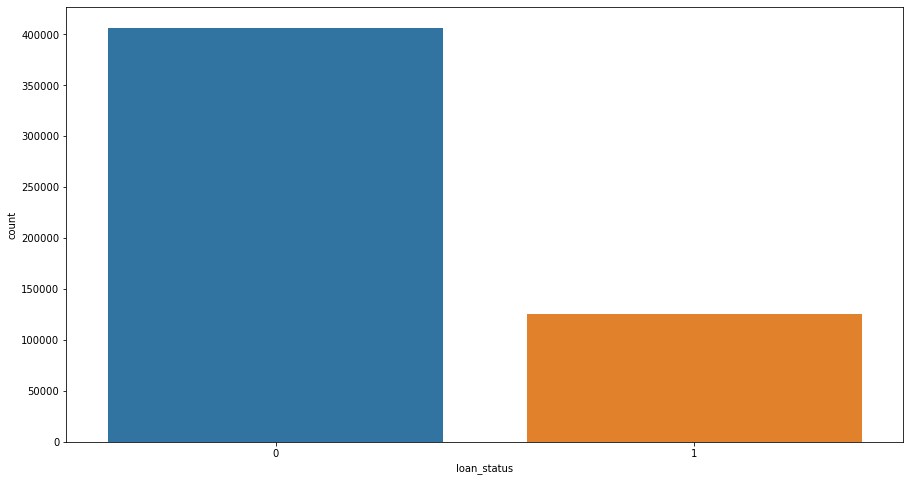

In [8]:
plt.figure(figsize=(15,8))
sns.countplot(df['loan_status'])
plt.show()

In [9]:
df['loan_status'].value_counts(normalize=True)

0   0.763673
1   0.236327
Name: loan_status, dtype: float64

#### <span style="color:#1c474d">
It is a highly imbalanced data with non Defaulters being three times that of Defaulters in the data.
</span>

### <span style="color:brown"> Checking for Duplicated Data.</span>

In [10]:
df.duplicated().sum()

0

#### <span style="color:#1c474d">
There are 0 Duplicated Data Points
</span>

### <span style="color:brown"> Analysis of each Features.</span> 

#### <span style="color:#1c474d">
We drop 'member_id' as it does not have any significance in prediction.
</span>

In [11]:
df.drop('member_id',axis=1,inplace= True)

In [12]:
df[['loan_amnt','funded_amnt','funded_amnt_inv']].corr()

,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.000000,0.999276,0.997124
funded_amnt,0.999276,1.000000,0.998041
funded_amnt_inv,0.997124,0.998041,1.000000


#### <span style="color:#1c474d">
Since 'loan_amnt','funded_amnt','funded_amnt_inv' are highly correlated and have 99% similar values we keep   'funded_amnt' out of the three features.
</span>

In [13]:
df.drop(['loan_amnt','funded_amnt_inv'],axis=1,inplace= True)

#### <span style="color:#1c474d">
We drop 'batch_enrolled' as it does not have any significance in prediction.
</span>

In [14]:
df.drop('batch_enrolled',axis=1,inplace= True)

In [15]:
df['emp_title'].nunique()

190124

In [16]:
df.drop('emp_title',axis=1,inplace= True)
df.drop(['title', 'zip_code', 'addr_state','desc'],axis=1,inplace= True)

#### <span style="color:#1c474d">
We drop 'emp_title','title','zip_code','addr_state','desc' as it does not have any significance in prediction.
</span>

In [17]:
df.drop(['delinq_2yrs', 'inq_last_6mths'],axis=1,inplace= True)

#### <span style="color:#1c474d"> 
Since these two features are giving the same information as mths_since_last_delinq we drop them.
</span>

In [18]:
df.drop('acc_now_delinq',axis=1,inplace= True)

#### <span style="color:#1c474d">
Since the standard deviation of this feature is close to 0 we drop this feature
</span>

In [19]:
df['sub_grade'].value_counts()

B3    33844
B4    33198
C1    31975
C2    31356
C3    30080
B2    29390
B5    29313
C4    29103
A5    27016
B1    26968
C5    24985
D1    21712
A4    20823
D2    17991
D3    15771
D4    15226
A3    14082
A1    13653
A2    13533
D5    12867
E1    10928
E2    10255
E3     8488
E4     7051
E5     5773
F1     4350
F2     3196
F3     2708
F4     2056
F5     1516
G1     1112
G2      824
G3      559
G4      391
G5      335
Name: sub_grade, dtype: int64

In [20]:
df.drop('sub_grade',axis=1,inplace= True)

#### <span style="color:#1c474d">
Since this feature gives the same information as 'grade' and has several categories which may lead to multicolinearity we decided to drop it.
</span>

In [21]:
def countplot(column_name):
    plt.figure(figsize=(15,8))
    sns.countplot(x=df[column_name], hue=df['loan_status'])
    plt.title('COUNT-PLOT OF {} v/s LOAN STATUS'.format(column_name))
    plt.show()

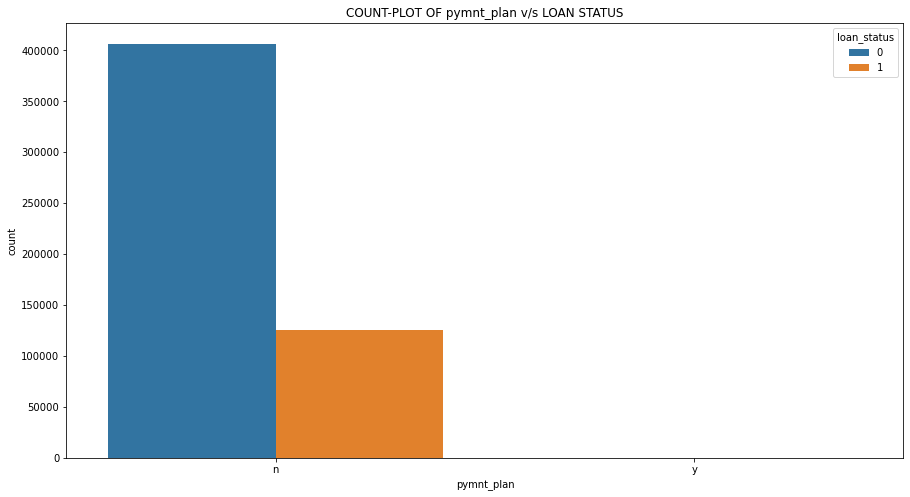

In [22]:
countplot('pymnt_plan')

In [23]:
df = df[df.pymnt_plan == 'n']
df.drop('pymnt_plan',axis=1,inplace= True)

#### <span style="color:#1c474d">
'pymnt_plan' feature contains all the observations as only one category which will not be of any significance in our analysis.So, we drop it.
</span> 

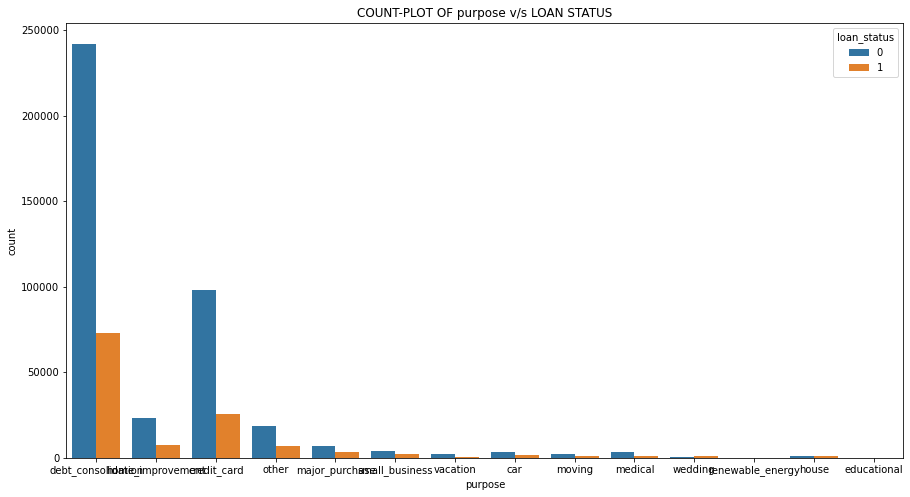

In [24]:
countplot('purpose')

#### <span style="color:#1c474d"> 
Majority of the loans were taken for debt consolidation, home improvement and credit card Other purposes constitute very small portion. So, Other types of purposes can be clubbed together
</span>

In [25]:
df['purpose'].replace(['other','major_purchase', 'small_business', 'vacation', 'car', 'moving',
                       'medical', 'wedding', 'renewable_energy', 'house', 'educational'], 'other', inplace=True)

#### <span style="color:#1c474d"> 
After clubbing ('major_purchase', 'small_business', 'vacation', 'car', 'moving', 'medical', 'wedding', 'renewable_energy', 'house', 'educational')  with 'other'
</span>

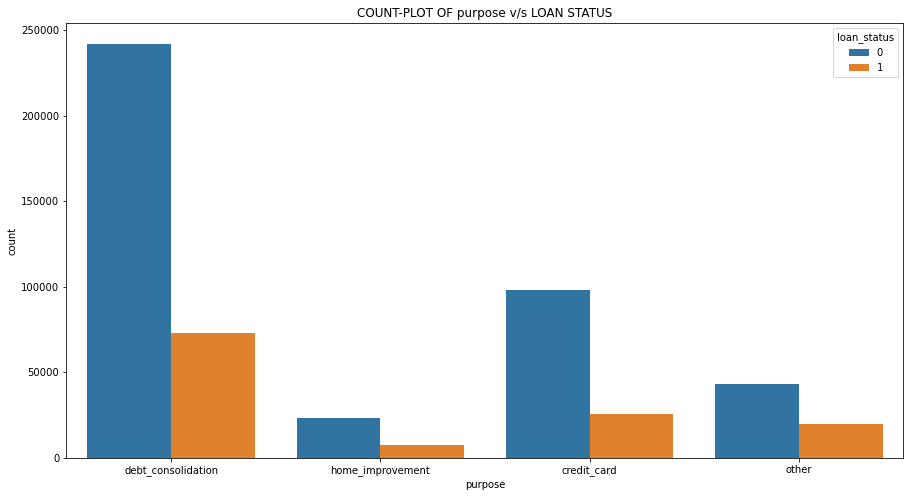

In [26]:
countplot('purpose')

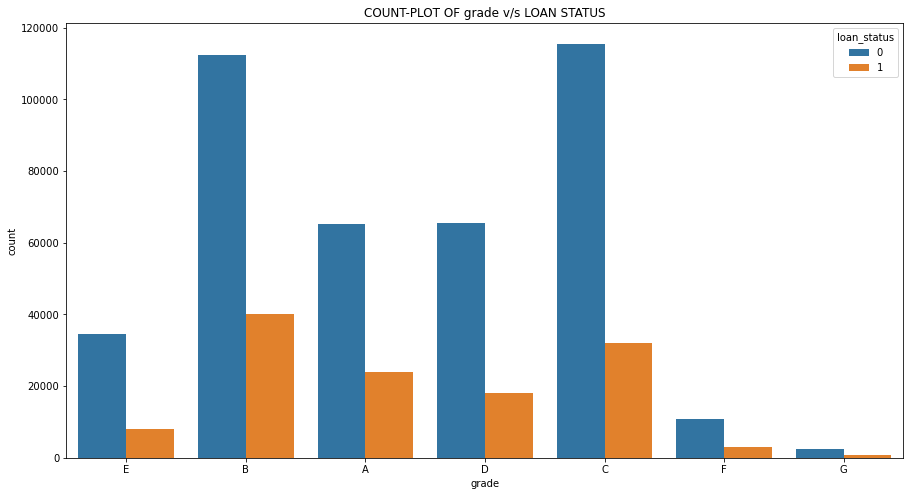

In [27]:
countplot('grade')

#### <span style="color:#1c474d">
Clubbing grades E,F,G into others since they have very less count
</span>

In [28]:
df['grade'].replace(['E','F','G'], 'others', inplace=True)

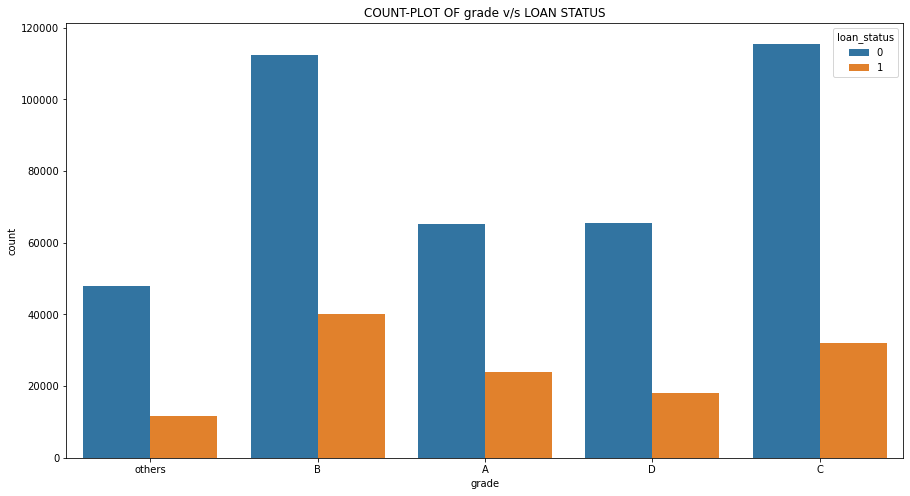

In [29]:
countplot('grade')

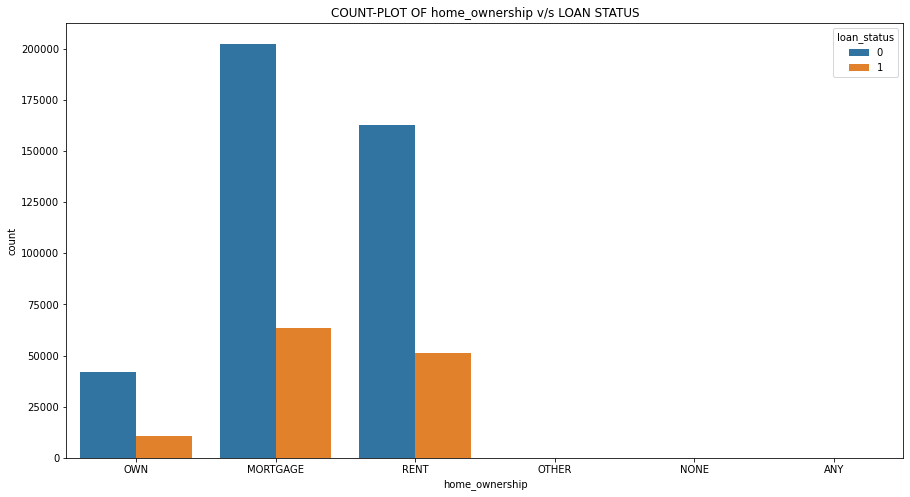

In [30]:
countplot('home_ownership')

#### <span style="color:#1c474d">
Clubbing OTHERS,NONE,ANY into OTHERS since they have very less count
</span>

In [31]:
df['home_ownership'].replace(['OTHER','NONE','ANY'],'OTHERS',inplace=True)

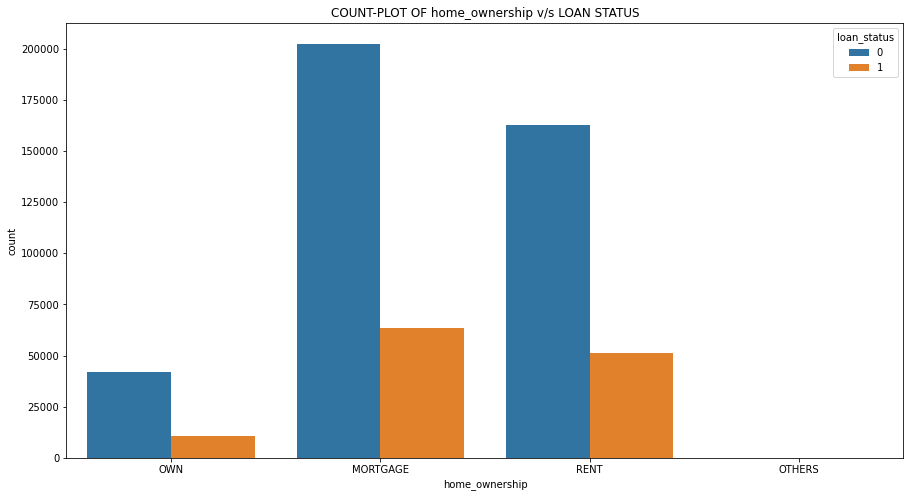

In [32]:
countplot('home_ownership')

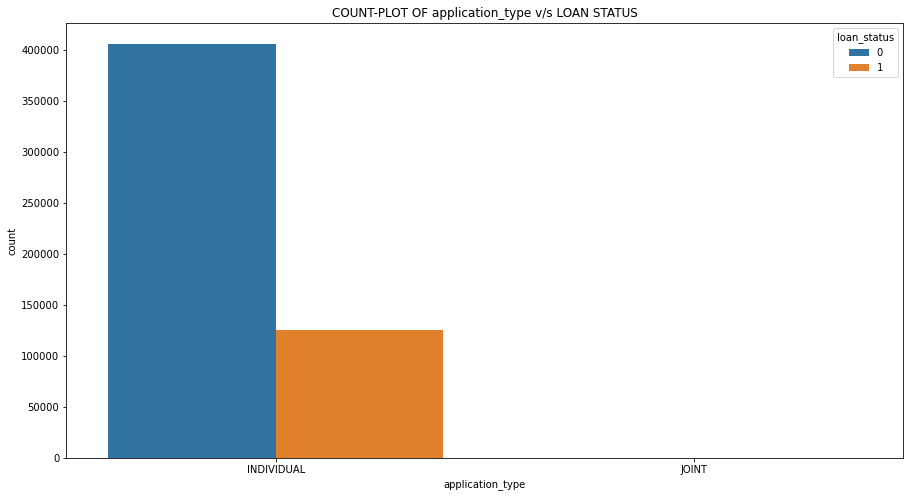

In [33]:
countplot('application_type')

#### <span style="color:#1c474d">
Application_type contains all the observations as only one category which will not be of any significance in our analysis. 
So, proceeding to drop it.
</span>

In [34]:
df.drop('application_type',axis  =1, inplace = True)

#### <span style="color:#1c474d">
After dropping redundant features, we are left with 30 features.
</span>

In [35]:
df.shape

(532420, 30)

In [36]:
df.columns

Index(['funded_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'verification_status_joint',
       'last_week_pay', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

## <span style="color:blue">NULL VALUE ANALYSIS</span> 

In [37]:
null_values=pd.DataFrame(data=df.isna().sum(),columns=['Count'])
null_values['Percentage']=df.isna().sum()/len(df)*100
null_values.sort_values(by='Percentage',ascending=False,inplace=True)
null_values

,Count,Percentage
verification_status_joint,532115,99.942714
mths_since_last_record,450298,84.575711
mths_since_last_major_derog,399441,75.023666
mths_since_last_delinq,272550,51.190789
total_rev_hi_lim,42001,7.888697
tot_cur_bal,42001,7.888697
tot_coll_amt,42001,7.888697
emp_length,26891,5.050712
revol_util,287,0.053905
collections_12_mths_ex_med,95,0.017843


In [38]:
for i in null_values[null_values['Count'] != 0].index:
    print('SUMMARY OF ',i)
    print('PERCENTAGE OF NULL VALUES IS: ', null_values.loc[i]['Percentage'])
    print()
    print(df[i].describe())
    print()

SUMMARY OF  verification_status_joint
PERCENTAGE OF NULL VALUES IS:  99.94271439840728

count              305
unique               3
top       Not Verified
freq               170
Name: verification_status_joint, dtype: object

SUMMARY OF  mths_since_last_record
PERCENTAGE OF NULL VALUES IS:  84.57571090492468

count   82122.000000
mean       70.093495
std        28.139124
min         0.000000
25%        51.000000
50%        70.000000
75%        92.000000
max       121.000000
Name: mths_since_last_record, dtype: float64

SUMMARY OF  mths_since_last_major_derog
PERCENTAGE OF NULL VALUES IS:  75.02366552721536

count   132979.000000
mean        44.121388
std         22.198477
min          0.000000
25%         27.000000
50%         44.000000
75%         61.000000
max        180.000000
Name: mths_since_last_major_derog, dtype: float64

SUMMARY OF  mths_since_last_delinq
PERCENTAGE OF NULL VALUES IS:  51.19078922655047

count   259870.000000
mean        34.055882
std         21.884597
min  

#### <span style="color:#1c474d">
The features 'verification_status_joint','mths_since_last_record','mths_since_last_major_derog' have high percentage of null values,thus we drop them.
</span>

In [39]:
df.drop(['verification_status_joint','mths_since_last_record','mths_since_last_major_derog'], axis=1,inplace=True)

#### <span style="color:#1c474d"> 
Percentage of Null Values in the feature total_rev_hi_lim is close to 8% and it is highly right skewed thus we impute the null values with the median.
</span>

In [40]:
df['total_rev_hi_lim'].skew()

77.38317433974389

In [41]:
 df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].median(),inplace=True)

#### <span style="color:#1c474d"> 
Percentage of Null Values in the feature tot_cur_bal is close to 8% and it is slightly right skewed thus we impute the null values with the median.
</span>

In [42]:
df['tot_cur_bal'].skew()

3.011769456780976

In [43]:
df['tot_cur_bal'].fillna(df['tot_cur_bal'].median(),inplace=True)

#### <span style="color:#1c474d"> 
Percentage of Null Values in the feature tot_coll_amt is close to 8%, it is also highly right skewed and 85% data of this feature consists of 0 thus we impute it with 0.
</span>

In [44]:
df['tot_coll_amt'].skew()

61.64189907293498

In [45]:
df['tot_coll_amt'].value_counts(normalize=True)[0] * 100

85.82436651108542

In [46]:
df['tot_coll_amt'].fillna(0,inplace=True)

#### <span style="color:#1c474d">
Since the feature 'mths_since_last_delinq' consists 51% of null values, imputing all of them with mean or median or mode will be add wrong information and this may lead to erroneous classification thus we group the data based on the grade and assign the mean of each grade to it's respective null value
</span>

In [47]:
a=df.groupby('grade')['mths_since_last_delinq'].mean()
dic={i:round(a[i]) for i in a.index}
dic

{'A': 36, 'B': 34, 'C': 34, 'D': 34, 'others': 33}

In [48]:
df['mths_since_last_delinq'].fillna(df['grade'].map(dic), inplace=True)

In [49]:
df.emp_length.unique()

array(['9 years', '< 1 year', '2 years', '10+ years', '5 years',
       '8 years', '7 years', '4 years', nan, '1 year', '3 years',
       '6 years'], dtype=object)

In [50]:
df['emp_length'].replace(to_replace=['< 1 year','1 year','2 years','3 years','4 years','5 years',  
                                          '6 years','7 years','8 years','9 years','10+ years'],
                                         value = [0,1,2,3,4,5,6,7,8,9,10],inplace=True)

In [51]:
df.emp_length.describe()

count   505529.000000
mean         6.010585
std          3.665449
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         10.000000
Name: emp_length, dtype: float64

In [52]:
df.groupby('grade')['emp_length'].mean()

grade
A        5.994163
B        6.008215
C        6.003396
D        6.012488
others   6.056344
Name: emp_length, dtype: float64

In [53]:
df['emp_length'].skew()

-0.24358065549477104

In [54]:
df['emp_length'].fillna(df['emp_length'].median(), inplace=True)

In [55]:
df['emp_length'] = df['emp_length'].astype(int)

### <span style="color:brown"> 
Since 'emp_length' has 10 categories, we reduce them into 3 categories as high, medium and low.
</span>

In [56]:
df['emp_length'] = ['Low' if i <= 3 else 'High' if i >= 8 else 'Medium' for i in df['emp_length']]

In [57]:
df.emp_length.unique()

array(['High', 'Low', 'Medium'], dtype=object)

In [58]:
df.dropna(inplace=True)

In [59]:
df.reset_index(inplace=True, drop = True)

In [60]:
df.isnull().sum().sum()

0

In [61]:
# ----------------------------------------------------- AFTER HANDLING NULL VALUES !!!

In [62]:
df.shape

(532057, 27)

In [63]:
df.head()

,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,14350,36 months,19.190000,others,High,OWN,28700.000000,Source Verified,debt_consolidation,33.880000,50.000000,14.000000,1.000000,22515.000000,73.100000,28.000000,f,1173.840000,0.000000,0.000000,0.000000,0.000000,26th week,0.000000,28699.000000,30800.000000,0
1,4800,36 months,10.990000,B,Low,MORTGAGE,65000.000000,Source Verified,home_improvement,3.640000,34.000000,6.000000,0.000000,7624.000000,23.200000,13.000000,w,83.950000,0.000000,0.000000,0.000000,0.000000,9th week,0.000000,9974.000000,32900.000000,0
2,10000,36 months,7.260000,A,Low,OWN,45000.000000,Not Verified,debt_consolidation,18.420000,36.000000,5.000000,0.000000,10877.000000,31.200000,19.000000,w,56.470000,0.000000,0.000000,0.000000,0.000000,9th week,65.000000,38295.000000,34900.000000,0
3,15000,36 months,19.720000,D,High,RENT,105000.000000,Not Verified,debt_consolidation,14.970000,46.000000,10.000000,0.000000,13712.000000,55.500000,21.000000,f,4858.620000,0.000000,0.000000,0.000000,0.000000,135th week,0.000000,55564.000000,24700.000000,0
4,16000,36 months,10.640000,B,High,RENT,52000.000000,Verified,credit_card,20.160000,34.000000,11.000000,0.000000,35835.000000,76.200000,27.000000,w,2296.410000,0.000000,0.000000,0.000000,0.000000,96th week,0.000000,47159.000000,47033.000000,0


In [64]:
df.to_csv('data_clean.csv',sep=",", index=False)

#### <span style="color:brown"> Seperating the Numerical and Categorical features.</span>

In [65]:
cat = df.select_dtypes(exclude=[np.number])
num = df.select_dtypes(include=[np.number])

In [66]:
cat.columns

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'initial_list_status', 'last_week_pay'],
      dtype='object')

In [67]:
num = num.columns[num.columns != 'loan_status']

In [68]:
#  --------------------------------

In [69]:
for i in cat.columns:
    print('COLUMN NAME: ',i)
    print('NUMBER OF SUB CLASSES: ', df[i].nunique())
    print()
    print(df[i].value_counts())
    print()
    print(df[i].describe())
    print()

COLUMN NAME:  term
NUMBER OF SUB CLASSES:  2

36 months    372490
60 months    159567
Name: term, dtype: int64

count        532057
unique            2
top       36 months
freq         372490
Name: term, dtype: object

COLUMN NAME:  grade
NUMBER OF SUB CLASSES:  5

B         152651
C         147401
A          89074
D          83473
others     59458
Name: grade, dtype: int64

count     532057
unique         5
top            B
freq      152651
Name: grade, dtype: object

COLUMN NAME:  emp_length
NUMBER OF SUB CLASSES:  3

High      222113
Low       165742
Medium    144202
Name: emp_length, dtype: int64

count     532057
unique         3
top         High
freq      222113
Name: emp_length, dtype: object

COLUMN NAME:  home_ownership
NUMBER OF SUB CLASSES:  4

MORTGAGE    265767
RENT        213514
OWN          52625
OTHERS         151
Name: home_ownership, dtype: int64

count       532057
unique           4
top       MORTGAGE
freq        265767
Name: home_ownership, dtype: object

COLUMN NA

## <span style="color:blue">UNIVARIATE ANALYSIS FOR CATEGORICAL FEATURES</span> 

In [70]:
def annot_percent(axes):
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

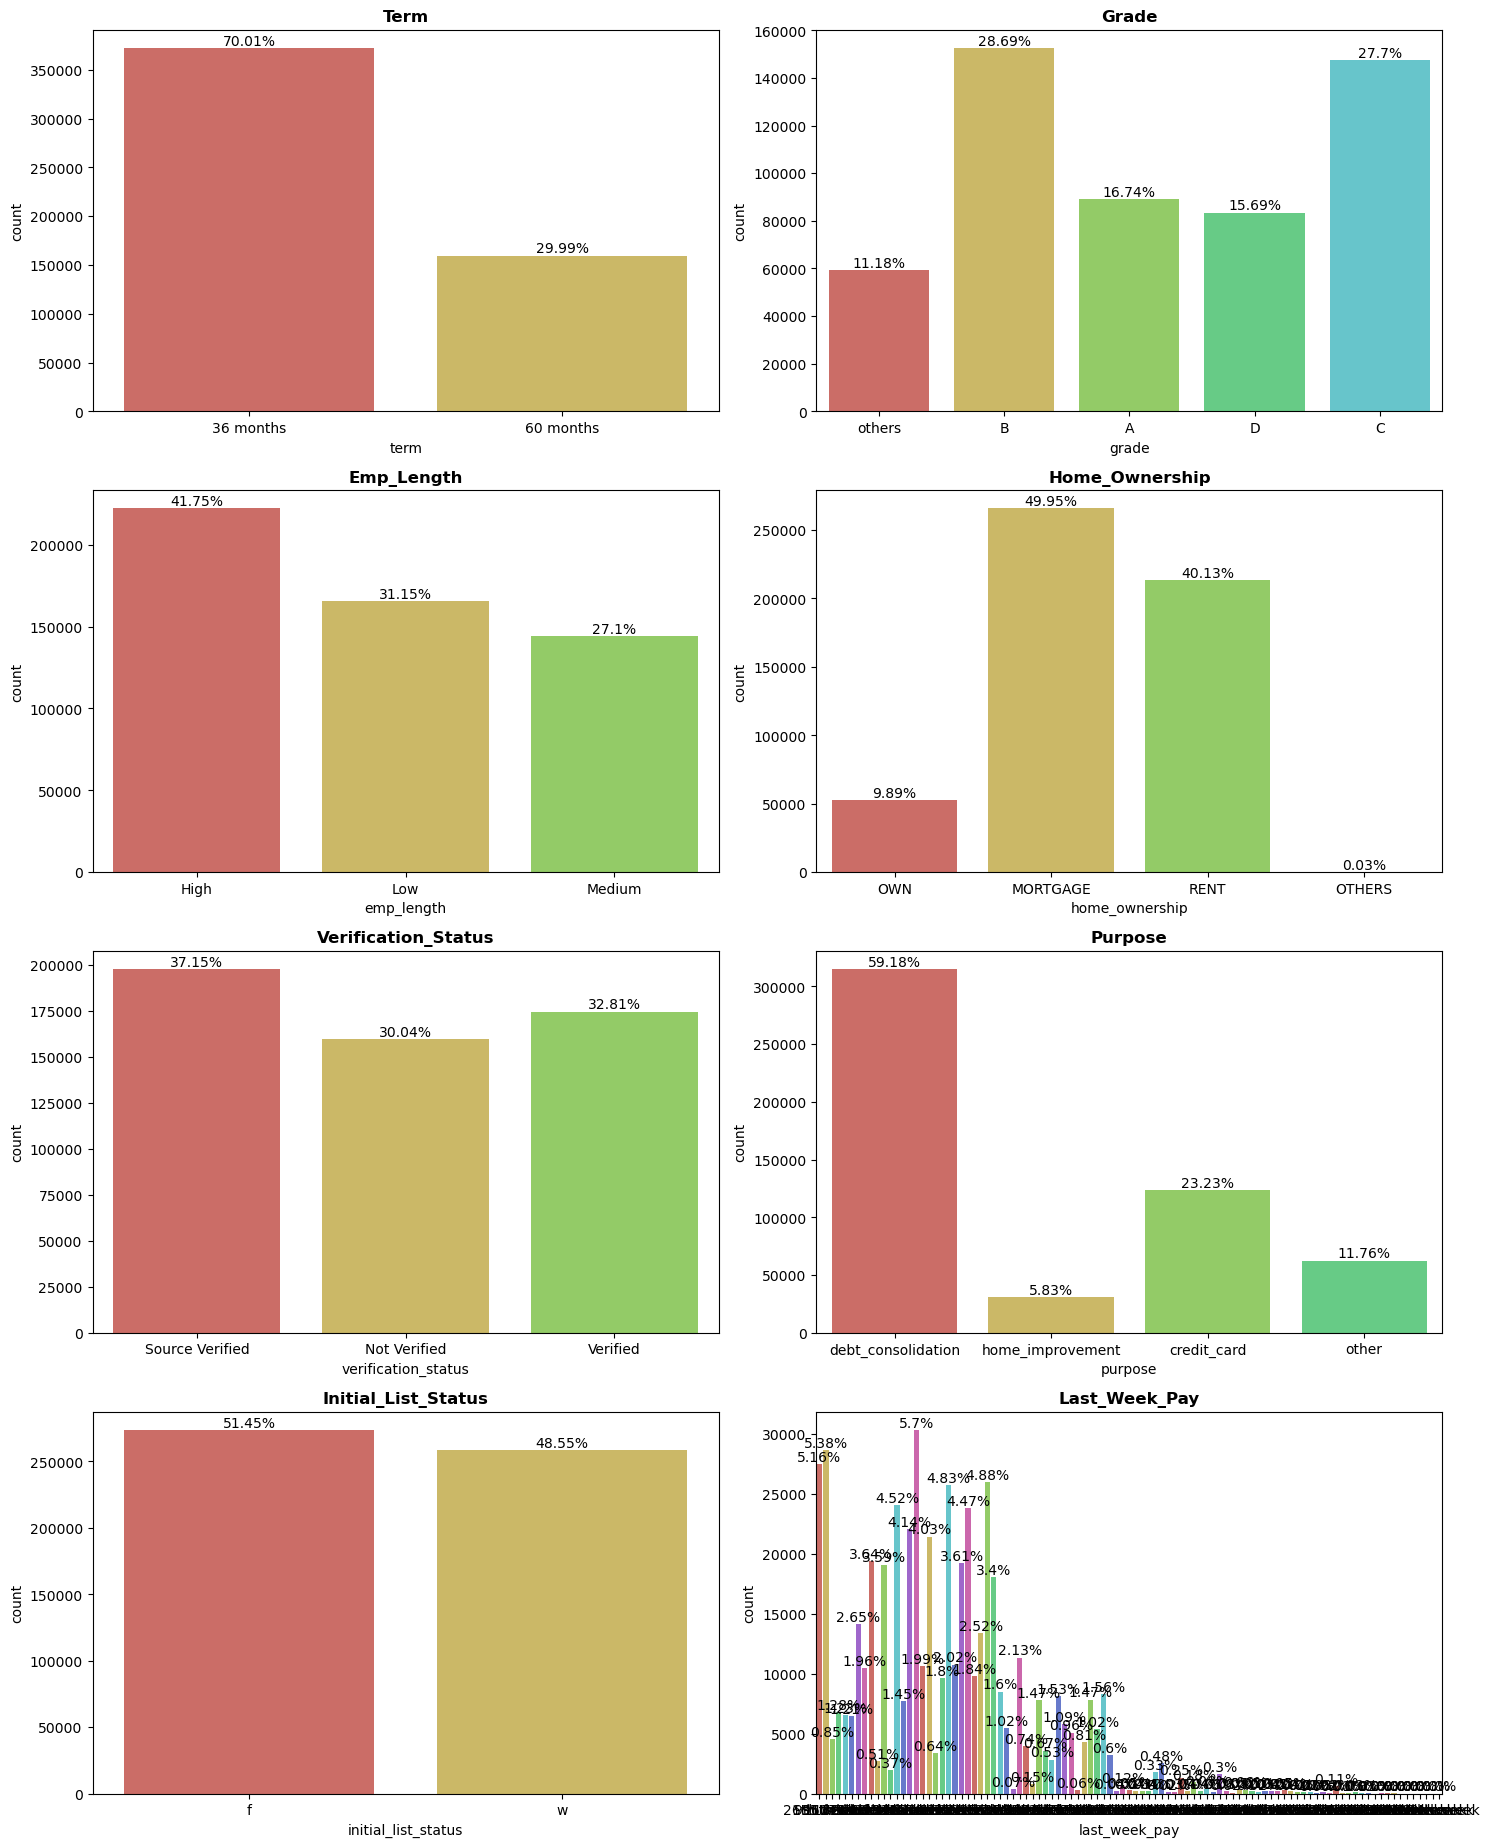

In [71]:
plt.figure(figsize=(15,55),dpi=100)
n=1
for i in cat:
    plot=plt.subplot(12,2,n)
    n+=1
    sns.countplot(df[i] ,palette=sns.color_palette("hls", 8))
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

#### <span style="color:#1c474d"> 
1. 70% of loan takers have a repayment tenure of 36 months.
2. Most of the loan takers belong to B and C Grade.
3. Most of the loan takers have more than 8 years of working experience.
4. Around 50% of the loan takers stay in a mortgaged house.
5. Almost 60% of the loan takers have taken the loan for debt consolidation.
</span>

## <span style="color:blue">UNIVARIATE ANALYSIS FOR NUMERICAL FEATURES</span>

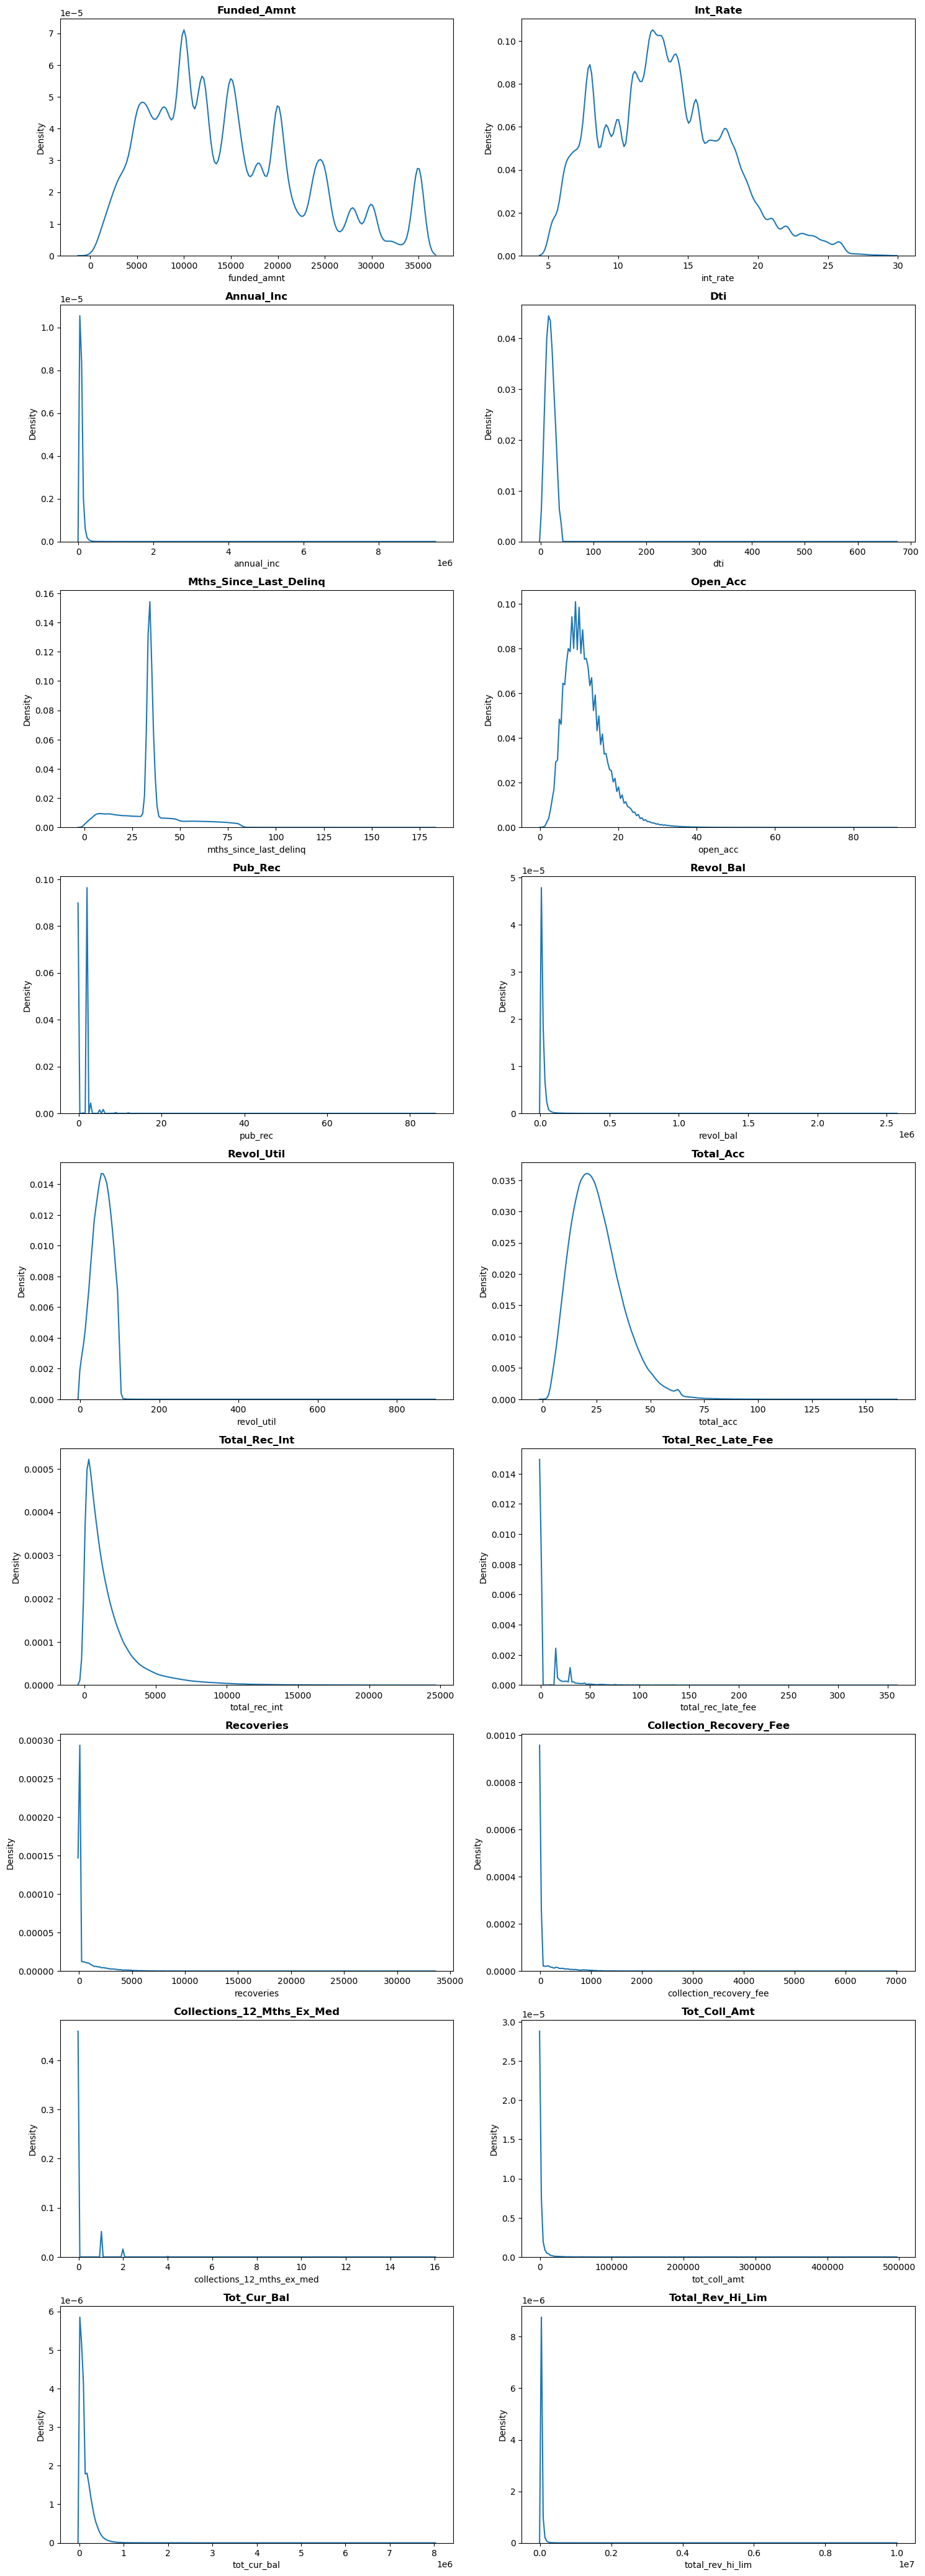

In [72]:
plt.figure(figsize=(15,55),dpi=100)
n=1
for i in num:
    plot=plt.subplot(12,2,n)
    n+=1
    sns.kdeplot(df[i] ,palette=sns.color_palette("hls", 8))
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()

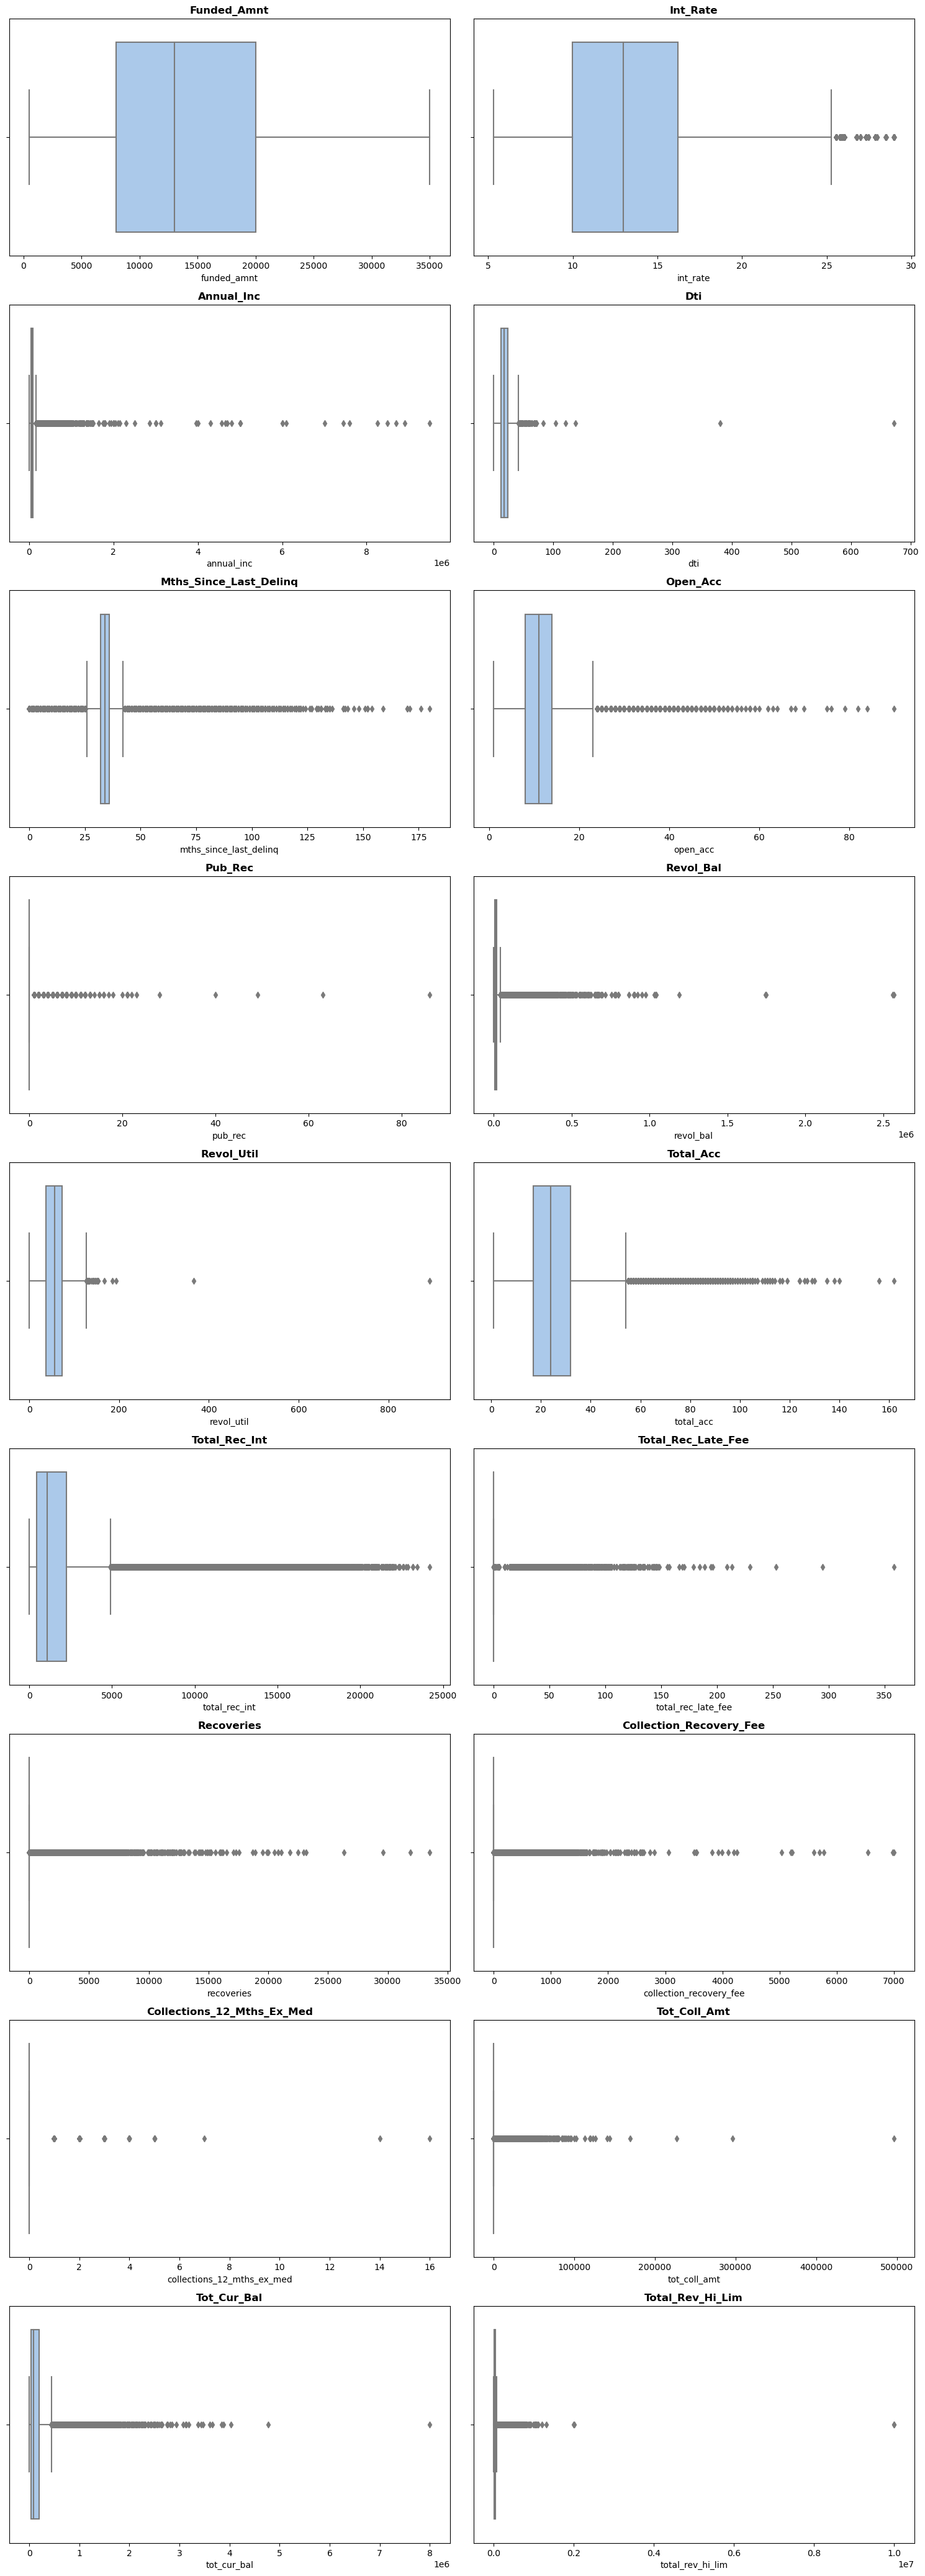

In [73]:
plt.figure(figsize=(15,55),dpi=100)
n=1
for i in num:
    plot=plt.subplot(12,2,n)
    n+=1
    sns.boxplot(df[i] ,palette=sns.color_palette("pastel", 8))
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()

#### <span style="color:#1c474d">
Since people with very low salary and high loan amount are outliers and they are more likely to default, there are many such data points which are outliers, removing them will lead to loss of important information,therefore we keep the outliers.  </span>

## <span style="color:blue">BIVARIATE ANALYSIS FOR CATEGORICAL FEATURES</span>

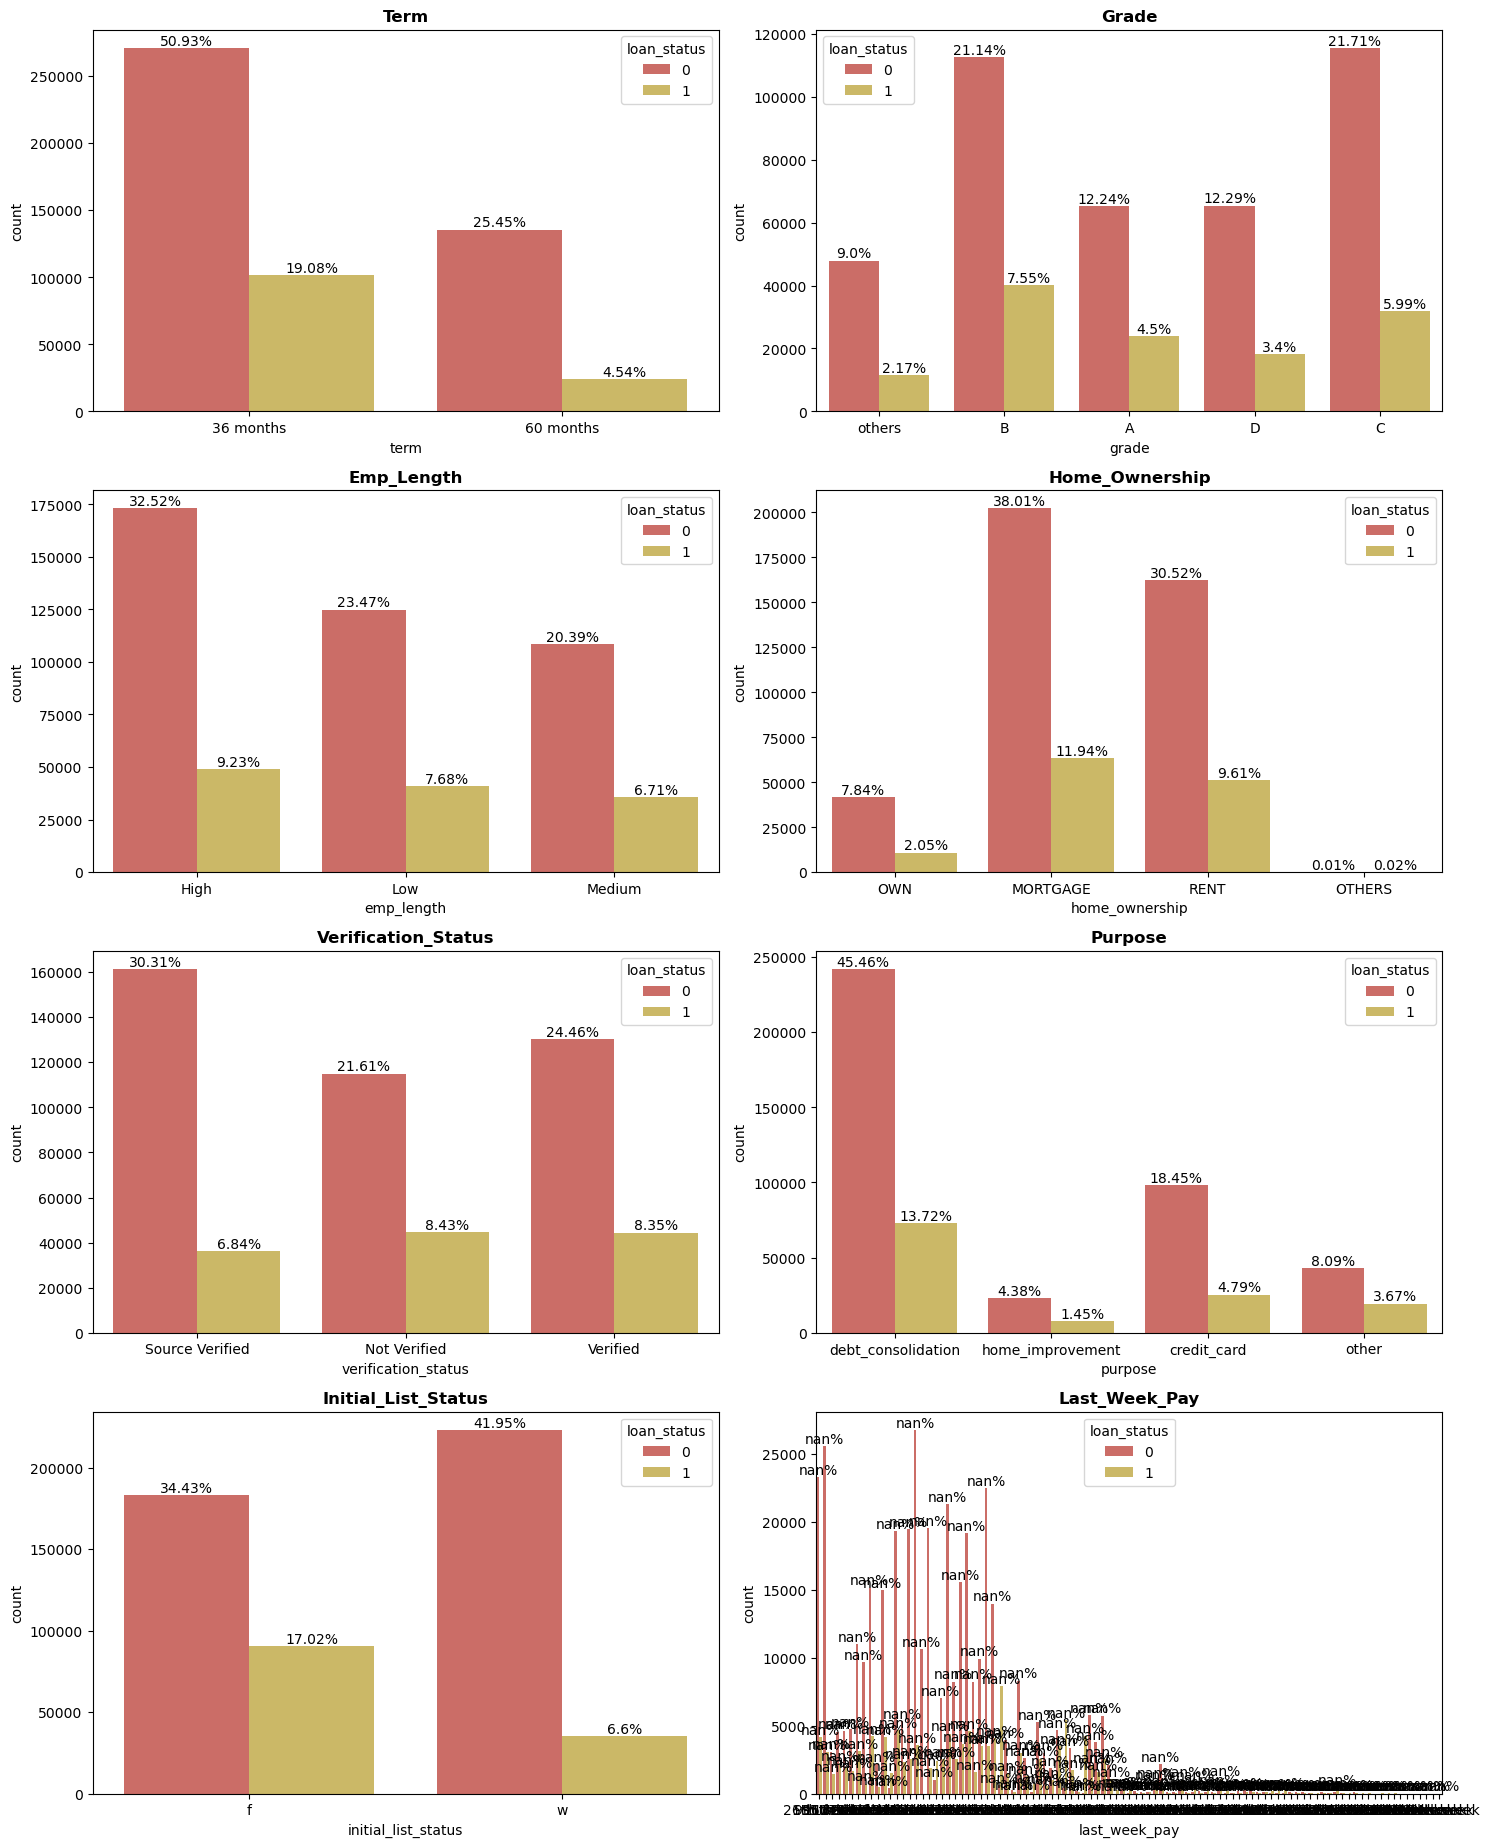

In [74]:
plt.figure(figsize=(15,55),dpi=100)
n=1
for i in cat:
    plot=plt.subplot(12,2,n)
    n+=1
    sns.countplot(df[i] ,hue=df['loan_status'], palette=sns.color_palette("hls", 8))
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

## <span style="color:blue">BIVARIATE ANALYSIS FOR NUMERICAL FEATURES</span>

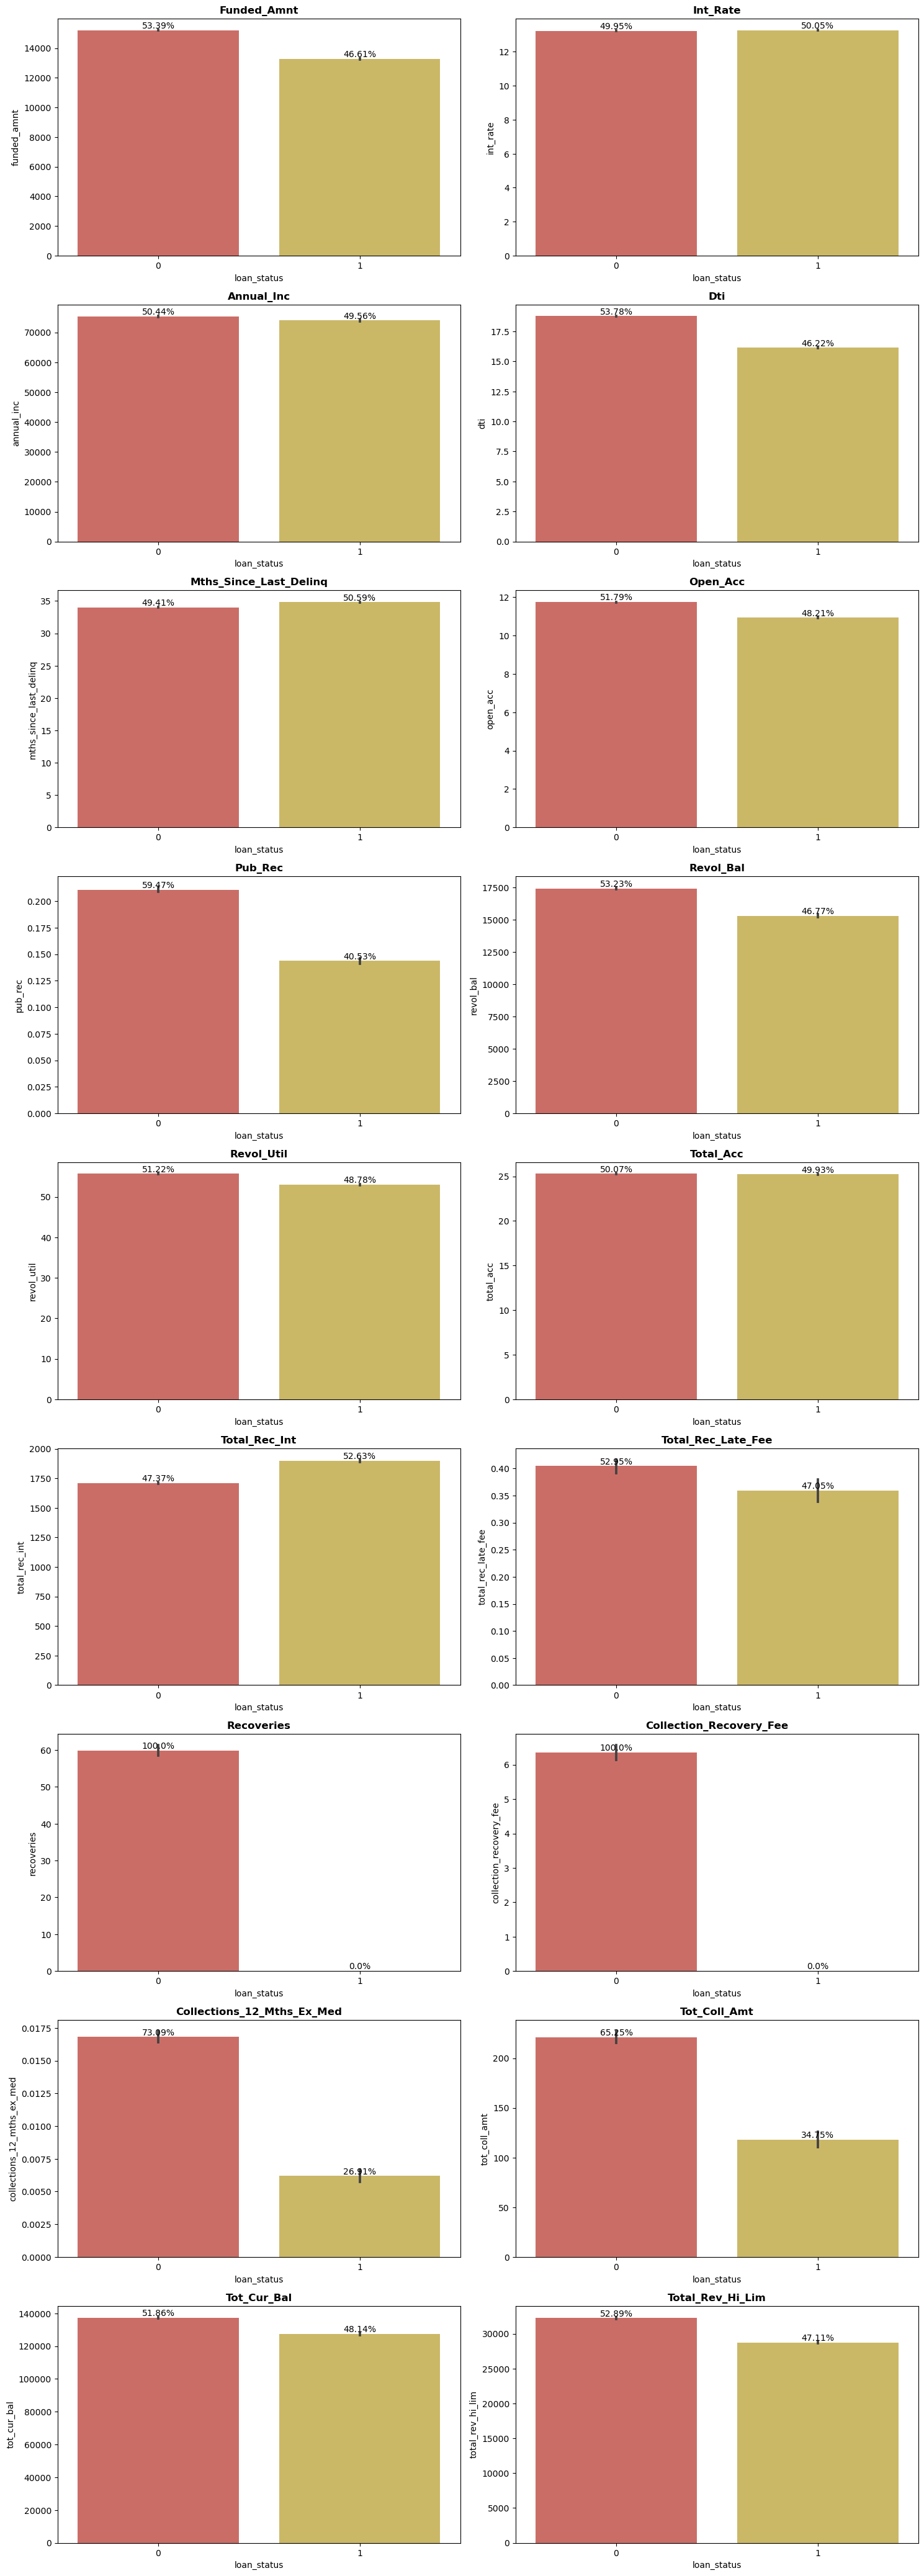

In [75]:
plt.figure(figsize=(15,55),dpi=100)
n=1
for i in num:
    plot=plt.subplot(12,2,n)
    n+=1
    sns.barplot(y = df[i] , x =df['loan_status'], palette=sns.color_palette("hls", 8))
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

#### <span style="color:#1c474d">
Since the defaulters are almost 3 times of non-defaulters, what we infer from the bivariate analysis is that:
1. Defaulters have more debt to pay back.
2. People who have defaulted have more public records.
3. The interest rate of defaulters is also more than that of defaulters.
4. On an average the dti of defaulters is lesser than that of non-defaulters.
5. 100 % Non-defaulters have payed back after being charged-off and none of defaulters have payed back after being charged-off.
6. The total collection amount of defaulters is less than that of non-defaulters.

</span>

### <span style="color:brown"> Cleaning the data and changing the data types.</span>

In [76]:
df['open_acc'] = df['open_acc'].astype(int)
df['pub_rec'] = df['pub_rec'].astype(int)
df['total_acc'] = df['total_acc'].astype(int)

In [77]:
# -------------------- last_week_pay

In [78]:
df['last_week_pay'] = df['last_week_pay'].str.extract('(\d+)', expand=False)
df.fillna('10000',inplace=True)
df['last_week_pay'] = df['last_week_pay'].replace('10000','13')
df['last_week_pay'] = df['last_week_pay'].astype(int)

In [79]:
# ------------------------ verification_status

In [80]:
df['verification_status'].replace('Source Verified','Verified',inplace=True)

In [81]:
# --------------------------- 

In [82]:
df.to_csv('data1.csv',sep=",", index=False)

## <span style="color:blue"> Feature Engineering.</span>

#### NEW FEATURE : 1

### <span style="color:brown"> 
We used features 'collection_recovery_fee' and 'recoveries' to create a new feature 'rec_and_col_fee' and dropped those two.
</span>

In [83]:

df['rec_and_col_fee']=df['collection_recovery_fee']+df['recoveries']
df.drop(columns=['collection_recovery_fee','recoveries'],axis=1,inplace=True)

In [84]:
df['rec_and_col_fee'].describe()

count   532057.000000
mean        50.547333
std        461.628012
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      37594.613600
Name: rec_and_col_fee, dtype: float64

#### NEW FEATURE : 2

### <span style="color:brown"> 
Similarly we used features 'last_week_pay' and 'term' to create a new feature 'emi_paid_progress_perc'.
</span>

In [85]:
df['emi_paid_progress_perc'] = ((df['last_week_pay']/(df['term'].str.replace('months','').astype(int)/12*52+1))*100)

In [86]:
# ------------------ drop last_week_pay
df.drop('last_week_pay', axis=1, inplace=True)

### <span style="color:brown">Saving the cleaned data set.</span>

In [87]:
df.to_csv('data2.csv',sep=",", index=False)

### <span style="color:brown"> Seperating Target, Numerical and Categorical features</span>

In [88]:
cat_f = df.select_dtypes(exclude=[np.number])

In [89]:
num_f = df.select_dtypes(include=[np.number])

In [90]:
num_f.drop('loan_status',axis=1,inplace=True)

In [91]:
df_target = df['loan_status']

In [92]:
for i in cat_f:
    print('COLUMN NAME: ',i)
    print('NUMBER OF SUB CLASSES: ', df[i].nunique())
    print('-'*30)
    print(df[i].value_counts())
    print()
    print(df[i].describe())
    print('#'*30)

COLUMN NAME:  term
NUMBER OF SUB CLASSES:  2
------------------------------
36 months    372490
60 months    159567
Name: term, dtype: int64

count        532057
unique            2
top       36 months
freq         372490
Name: term, dtype: object
##############################
COLUMN NAME:  grade
NUMBER OF SUB CLASSES:  5
------------------------------
B         152651
C         147401
A          89074
D          83473
others     59458
Name: grade, dtype: int64

count     532057
unique         5
top            B
freq      152651
Name: grade, dtype: object
##############################
COLUMN NAME:  emp_length
NUMBER OF SUB CLASSES:  3
------------------------------
High      222113
Low       165742
Medium    144202
Name: emp_length, dtype: int64

count     532057
unique         3
top         High
freq      222113
Name: emp_length, dtype: object
##############################
COLUMN NAME:  home_ownership
NUMBER OF SUB CLASSES:  4
------------------------------
MORTGAGE    265767
RENT 

In [93]:
cat_f.shape

(532057, 7)

### <span style="color:brown"> ENCODING OF CATEGORICAL FEATURES </span>  

In [94]:
# ONE HOT ENCODING

In [95]:
df_cat = pd.get_dummies(cat_f, drop_first=True)
df_cat.shape

(532057, 15)

### <span style="color:brown"> CHECKING FOR TRANSFORMATION OF NUMERICAL FEATURES. </span>  

In [96]:
num_f.head()

,funded_amnt,int_rate,annual_inc,dti,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,rec_and_col_fee,emi_paid_progress_perc
0,14350,19.190000,28700.000000,33.880000,50.000000,14,1,22515.000000,73.100000,28,1173.840000,0.000000,0.000000,0.000000,28699.000000,30800.000000,0.000000,16.560510
1,4800,10.990000,65000.000000,3.640000,34.000000,6,0,7624.000000,23.200000,13,83.950000,0.000000,0.000000,0.000000,9974.000000,32900.000000,0.000000,5.732484
2,10000,7.260000,45000.000000,18.420000,36.000000,5,0,10877.000000,31.200000,19,56.470000,0.000000,0.000000,65.000000,38295.000000,34900.000000,0.000000,5.732484
3,15000,19.720000,105000.000000,14.970000,46.000000,10,0,13712.000000,55.500000,21,4858.620000,0.000000,0.000000,0.000000,55564.000000,24700.000000,0.000000,85.987261
4,16000,10.640000,52000.000000,20.160000,34.000000,11,0,35835.000000,76.200000,27,2296.410000,0.000000,0.000000,0.000000,47159.000000,47033.000000,0.000000,61.146497


In [97]:
num_f.skew()

funded_amnt                   0.683197
int_rate                      0.428628
annual_inc                   44.835335
dti                           1.290799
mths_since_last_delinq        0.626031
open_acc                      1.252816
pub_rec                      15.316560
revol_bal                    16.005419
revol_util                   -0.089604
total_acc                     0.893383
total_rec_int                 2.833214
total_rec_late_fee           17.716336
collections_12_mths_ex_med   15.756420
tot_coll_amt                 64.156486
tot_cur_bal                   3.173601
total_rev_hi_lim             80.281007
rec_and_col_fee              18.348092
emi_paid_progress_perc        1.027841
dtype: float64

## <span style="color:blue">Checking for Assumtions</span>

<AxesSubplot:>

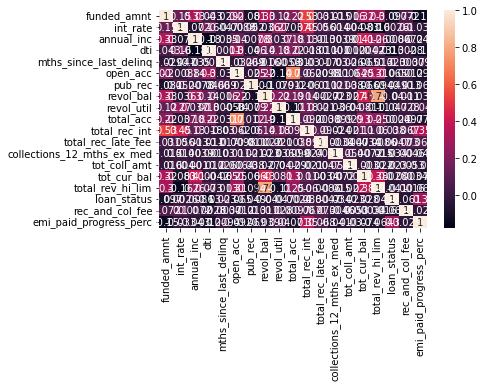

In [98]:
sns.heatmap(df.corr(), annot = True)

### <span style="color:brown"> Multicolinearity Based on VIF</span>

In [99]:
def VIF(dataframe):
    x=dataframe.select_dtypes(include=[np.number])
    vif=pd.DataFrame(columns=['Feature','VIF'])
    for i in range(len(x.columns)):
        vif.loc[i]=[x.columns[i],variance_inflation_factor(x.values,i)]
        vif.sort_values(by='VIF',ascending=False,inplace=True)
    return vif

### <span style="color:brown">
VIF is not very high for any features so we decided to use all features to build our basic model and based on the p_value of each feature we'll decide it's significance for our prediction.
</span>

In [100]:
VIF(df)

,Feature,VIF
5,open_acc,12.272925
9,total_acc,11.295260
1,int_rate,11.237203
8,revol_util,8.644506
0,funded_amnt,7.600825
3,dti,7.212553
15,total_rev_hi_lim,5.989397
7,revol_bal,5.577459
4,mths_since_last_delinq,5.224795
10,total_rec_int,3.589924


## <span style="color:blue"> Statistical Test</span>

### <span style="color:brown"> Performing Test of Independence(Chi2_contingency) for the categorical Features.</span>

In [101]:
Dependent_features=pd.DataFrame(columns=['Feature','Target','P_Value','Dependency'])
for i in df_cat.columns:
    table=pd.crosstab(df_cat[i],df_target)
    observed_table=table.values
    test_stat,p_value,dof,expected_value=chi2_contingency(observed=table,correction=False)
    if p_value<0.05:
        Dependent_features=Dependent_features.append({'Feature':i,'Target':'Loan_Status','P_Value':round(p_value,3),'Dependency':'Dependent'},ignore_index=True)
    else:
        Dependent_features=Dependent_features.append({'Feature':i,'Target':'Loan_Status','P_Value':round(p_value,3),'Dependency':'Independent'},ignore_index=True)
print('Target variable is dependent on the following Features: ')
Dependent_features

Target variable is dependent on the following Features: 


,Feature,Target,P_Value,Dependency
0,term_60 months,Loan_Status,0.000000,Dependent
1,grade_B,Loan_Status,0.000000,Dependent
2,grade_C,Loan_Status,0.000000,Dependent
3,grade_D,Loan_Status,0.000000,Dependent
4,grade_others,Loan_Status,0.000000,Dependent
5,emp_length_Low,Loan_Status,0.000000,Dependent
6,emp_length_Medium,Loan_Status,0.000000,Dependent
7,home_ownership_OTHERS,Loan_Status,0.000000,Dependent
8,home_ownership_OWN,Loan_Status,0.000000,Dependent
9,home_ownership_RENT,Loan_Status,0.000000,Dependent


### <span style="color:brown">
We tested if every feature is dependent on the Target Variable, the P_value of all the feature came out to be less than 0.05 (Level of Significance) and thus we reject Null hypothesis. Therefore all the features are dependent on the Target Variable.
</span>